In [1]:
import pandas as pd

DATA_IN_PATH = './chatbot.csv'

data = pd.read_csv(DATA_IN_PATH, encoding='utf-8')

In [6]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [7]:
data['label'].value_counts()

0    5290
1    3570
2    2963
Name: label, dtype: int64

# 문장 전체에 대한 분석

* 문자 단위의 길이 분석 
* 단어 단위의 길이 분석
* 형태소 단위의 길이 분석 

In [8]:
sentences = list(data['Q']) + list(data['A'])

tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjol = [len(s.replace(' ', ''))  for s in sentences]

from konlpy.tag import Okt

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morpth = [len(t) for t in morph_tokenized_sentences]

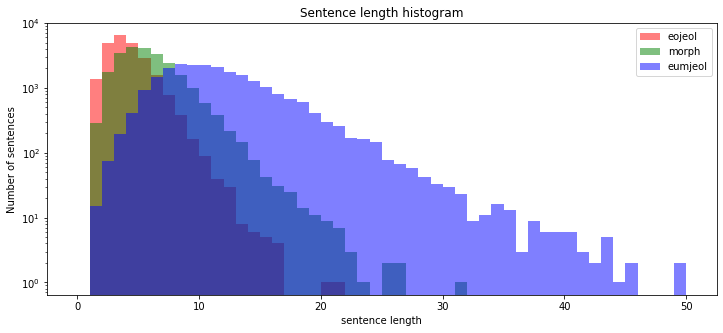

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morpth, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.legend()
plt.title('Sentence length histogram')
plt.xlabel('sentence length')
plt.ylabel('Number of sentences')
plt.yscale('log')

In [13]:
import numpy as np

def stat(data, target_name):
    print('{} 최대  길이: {}'.format(target_name, np.max(data)))
    print('{} 최소  길이: {}'.format(target_name, np.min(data)))
    print('{} 평균  길이: {}'.format(target_name, np.mean(data)))
    print('{} 길이 표준편차: {}'.format(target_name, np.std(data)))
    print('{} 제 1사분위 길이: {}'.format(target_name, np.percentile(data, 25)))
    print('{} 제 3사분위 길이: {}'.format(target_name, np.percentile(data, 75)))
    
stat(sent_len_by_token, '어절')
print('\n')
stat(sent_len_by_morpth, '형태소')    
print('\n')
stat(sent_len_by_eumjol, '음절')

어절 최대  길이: 21
어절 최소  길이: 1
어절 평균  길이: 3.6405311680622514
어절 길이 표준편차: 1.7429127513124947
어절 제 1사분위 길이: 2.0
어절 제 3사분위 길이: 5.0


형태소 최대  길이: 31
형태소 최소  길이: 1
형태소 평균  길이: 5.412543347712087
형태소 길이 표준편차: 2.5609101900628315
형태소 제 1사분위 길이: 4.0
형태소 제 3사분위 길이: 7.0


음절 최대  길이: 57
음절 최소  길이: 1
음절 평균  길이: 11.306563477966675
음절 길이 표준편차: 4.9788384182221925
음절 제 1사분위 길이: 8.0
음절 제 3사분위 길이: 14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f55ffc05780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55ffc05e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55ffc05ba8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f55fff98cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f55fff98630>,
 'means': [<matplotlib.lines.Line2D at 0x7f55fff98b70>,
  <matplotlib.lines.Line2D at 0x7f55ffe5f630>]}

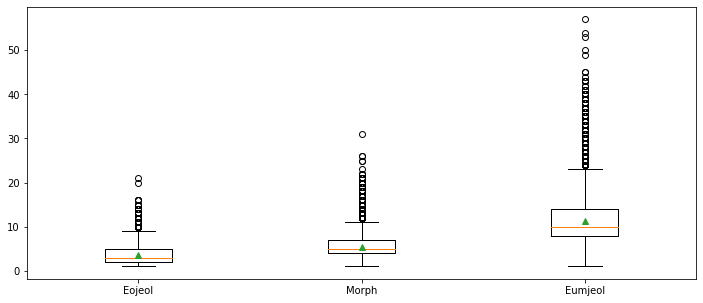

In [17]:
plt.figure(figsize=(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morpth, sent_len_by_eumjol], labels=['Eojeol', 'Morph', 'Eumjeol'], showmeans=True)

# 질문, 답변 각각에 대한 문장 길이 분포 분석

In [10]:
q_sentences = list(data['Q'])
a_sentences = list(data['A'])

from konlpy.tag import Okt
okt = Okt()

q_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in q_sentences]
a_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in a_sentences]
q_sent_len_by_morpth = [len(t) for t in q_morph_tokenized_sentences]
a_sent_len_by_morpth = [len(t) for t in a_morph_tokenized_sentences]

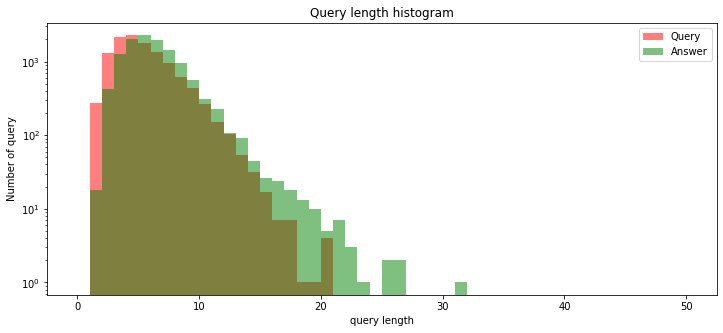

In [11]:
plt.figure(figsize=(12,5))
plt.hist(q_sent_len_by_morpth, bins=50, range=[0,50], alpha=0.5, color='r', label='Query')
plt.hist(a_sent_len_by_morpth, bins=50, range=[0,50], alpha=0.5, color='g', label='Answer')
plt.legend()
plt.title('Query length histogram')
plt.xlabel('query length')
plt.ylabel('Number of query')
plt.yscale('log')

In [15]:
stat(q_sent_len_by_morpth, 'Query')
print('\n')
stat(a_sent_len_by_morpth, 'Answer')  

Query 최대  길이: 20
Query 최소  길이: 1
Query 평균  길이: 4.950435591643407
Query 길이 표준편차: 2.4822972183834886
Query 제 1사분위 길이: 3.0
Query 제 3사분위 길이: 6.0


Answer 최대  길이: 31
Answer 최소  길이: 1
Answer 평균  길이: 5.874651103780766
Answer 길이 표준편차: 2.554923749606479
Answer 제 1사분위 길이: 4.0
Answer 제 3사분위 길이: 7.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fcd086f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fcd091550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fcd086d30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f0fcd091b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fcd09e048>,
 'means': [<matplotlib.lines.Line2D at 0x7f0fcd091dd8>,
  <matplotlib.lines.Line2D at 0x7f0fcd0ac550>]}

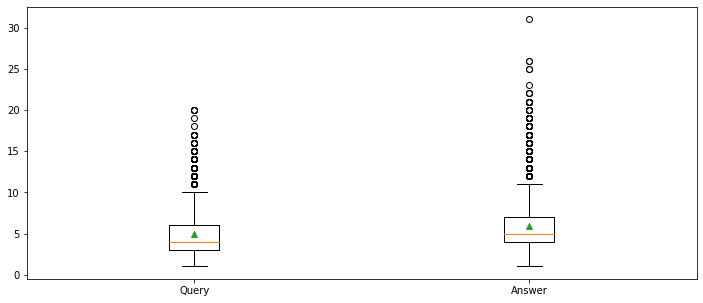

In [16]:
plt.figure(figsize=(12,5))
plt.boxplot([q_sent_len_by_morpth, a_sent_len_by_morpth], labels=['Query', 'Answer'], showmeans=True)

# 데이터 어휘 빈도 분석

In [17]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [20]:
# Noun, Adjective, Verb 만 있는 문장으로 변환

def get_NVA_sentences(sentences):
    NVA_sentences = []
    
    for s in sentences:
        for token, tag in okt.pos(s.replace(' ', '')):
            if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
                NVA_sentences.append(token)
    return NVA_sentences

q_NVA_sentences = get_NVA_sentences(q_sentences)
a_NVA_sentences = get_NVA_sentences(a_sentences)

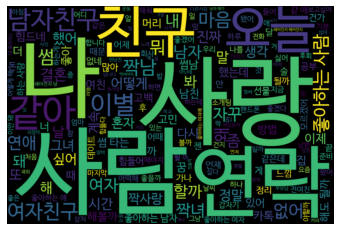

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    width = 1200,
    height = 800
)

q_wordcloud = wordcloud.generate_from_text(' '.join(q_NVA_sentences))

plt.imshow(q_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

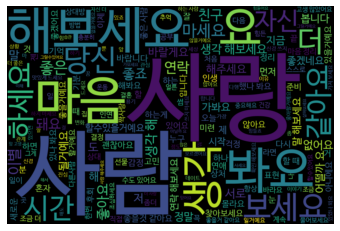

In [52]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    width = 1200,
    height = 800
)

a_wordcloud = wordcloud.generate_from_text(' '.join(a_NVA_sentences))

plt.imshow(a_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()